In [136]:

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [138]:

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [140]:

df = pd.read_csv('car.csv')
df


,Unnamed: 0,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,19537,Hyundai i10,Hyundai,i10,9,10723,Dealer,Petrol,Manual,19.81,1086,68.05,5,250000
15407,19540,Maruti Ertiga,Maruti,Ertiga,2,18000,Dealer,Petrol,Manual,17.50,1373,91.10,7,925000
15408,19541,Skoda Rapid,Skoda,Rapid,6,67000,Dealer,Diesel,Manual,21.14,1498,103.52,5,425000
15409,19542,Mahindra XUV500,Mahindra,XUV500,5,3800000,Dealer,Diesel,Manual,16.00,2179,140.00,7,1225000


In [142]:

df.drop(columns=['Unnamed: 0'],inplace = True)


In [144]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15411 entries, 0 to 15410
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   car_name           15411 non-null  object 
 1   brand              15411 non-null  object 
 2   model              15411 non-null  object 
 3   vehicle_age        15411 non-null  int64  
 4   km_driven          15411 non-null  int64  
 5   seller_type        15411 non-null  object 
 6   fuel_type          15411 non-null  object 
 7   transmission_type  15411 non-null  object 
 8   mileage            15411 non-null  float64
 9   engine             15411 non-null  int64  
 10  max_power          15411 non-null  float64
 11  seats              15411 non-null  int64  
 12  selling_price      15411 non-null  int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 1.5+ MB


In [146]:

df.describe()


,vehicle_age,km_driven,mileage,engine,max_power,seats,selling_price
count,15411.000000,1.541100e+04,15411.000000,15411.000000,15411.000000,15411.000000,1.541100e+04
mean,6.036338,5.561648e+04,19.701151,1486.057751,100.588254,5.325482,7.749711e+05
std,3.013291,5.161855e+04,4.171265,521.106696,42.972979,0.807628,8.941284e+05
min,0.000000,1.000000e+02,4.000000,793.000000,38.400000,0.000000,4.000000e+04
25%,4.000000,3.000000e+04,17.000000,1197.000000,74.000000,5.000000,3.850000e+05
50%,6.000000,5.000000e+04,19.670000,1248.000000,88.500000,5.000000,5.560000e+05
75%,8.000000,7.000000e+04,22.700000,1582.000000,117.300000,5.000000,8.250000e+05
max,29.000000,3.800000e+06,33.540000,6592.000000,626.000000,9.000000,3.950000e+07


In [148]:

x=df["seats"].mode()[0]
df['seats']=df["seats"].replace(0, x)


In [150]:

df.isnull().sum()


car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [152]:

df.duplicated().sum()


167

In [154]:

df.drop_duplicates(inplace = True)


In [156]:

le = LabelEncoder()

df['car_name']          = le.fit_transform(df['car_name'])
df['brand']             = le.fit_transform(df['brand'])
df['model']             = le.fit_transform(df['model'])
df['seller_type']       = le.fit_transform(df['seller_type'])
df['fuel_type']         = le.fit_transform(df['fuel_type'])
df['transmission_type'] = le.fit_transform(df['transmission_type'])


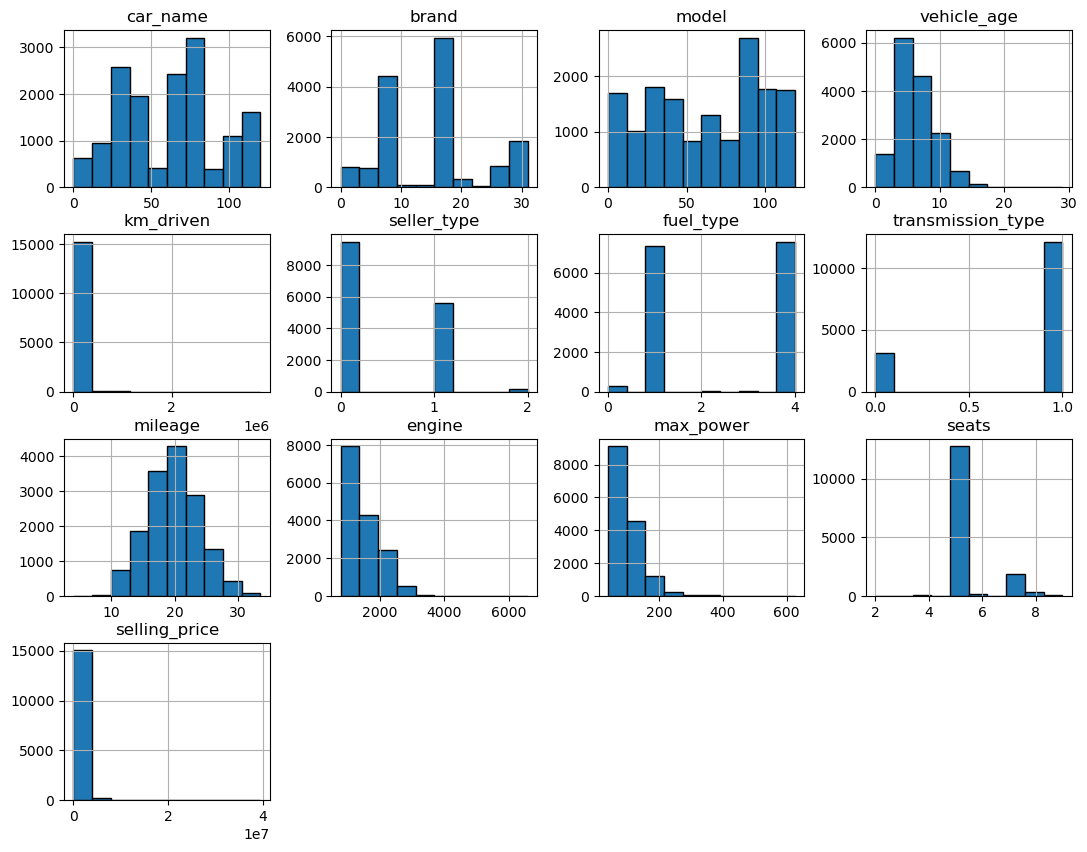

In [158]:

df.hist(edgecolor = 'k', figsize = (13,10))
plt.show()


<Axes: xlabel='km_driven', ylabel='selling_price'>

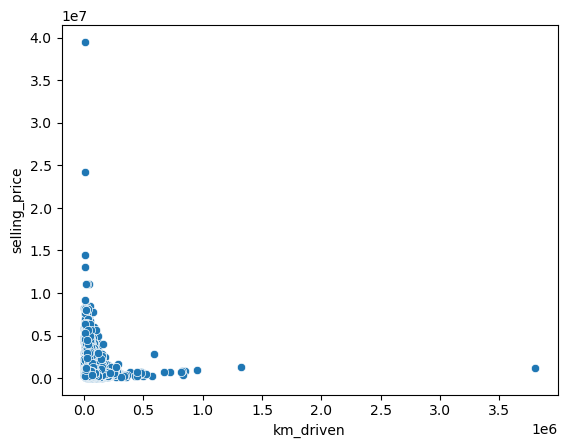

In [159]:

sns.scatterplot(x = 'km_driven', y = 'selling_price', data = df)


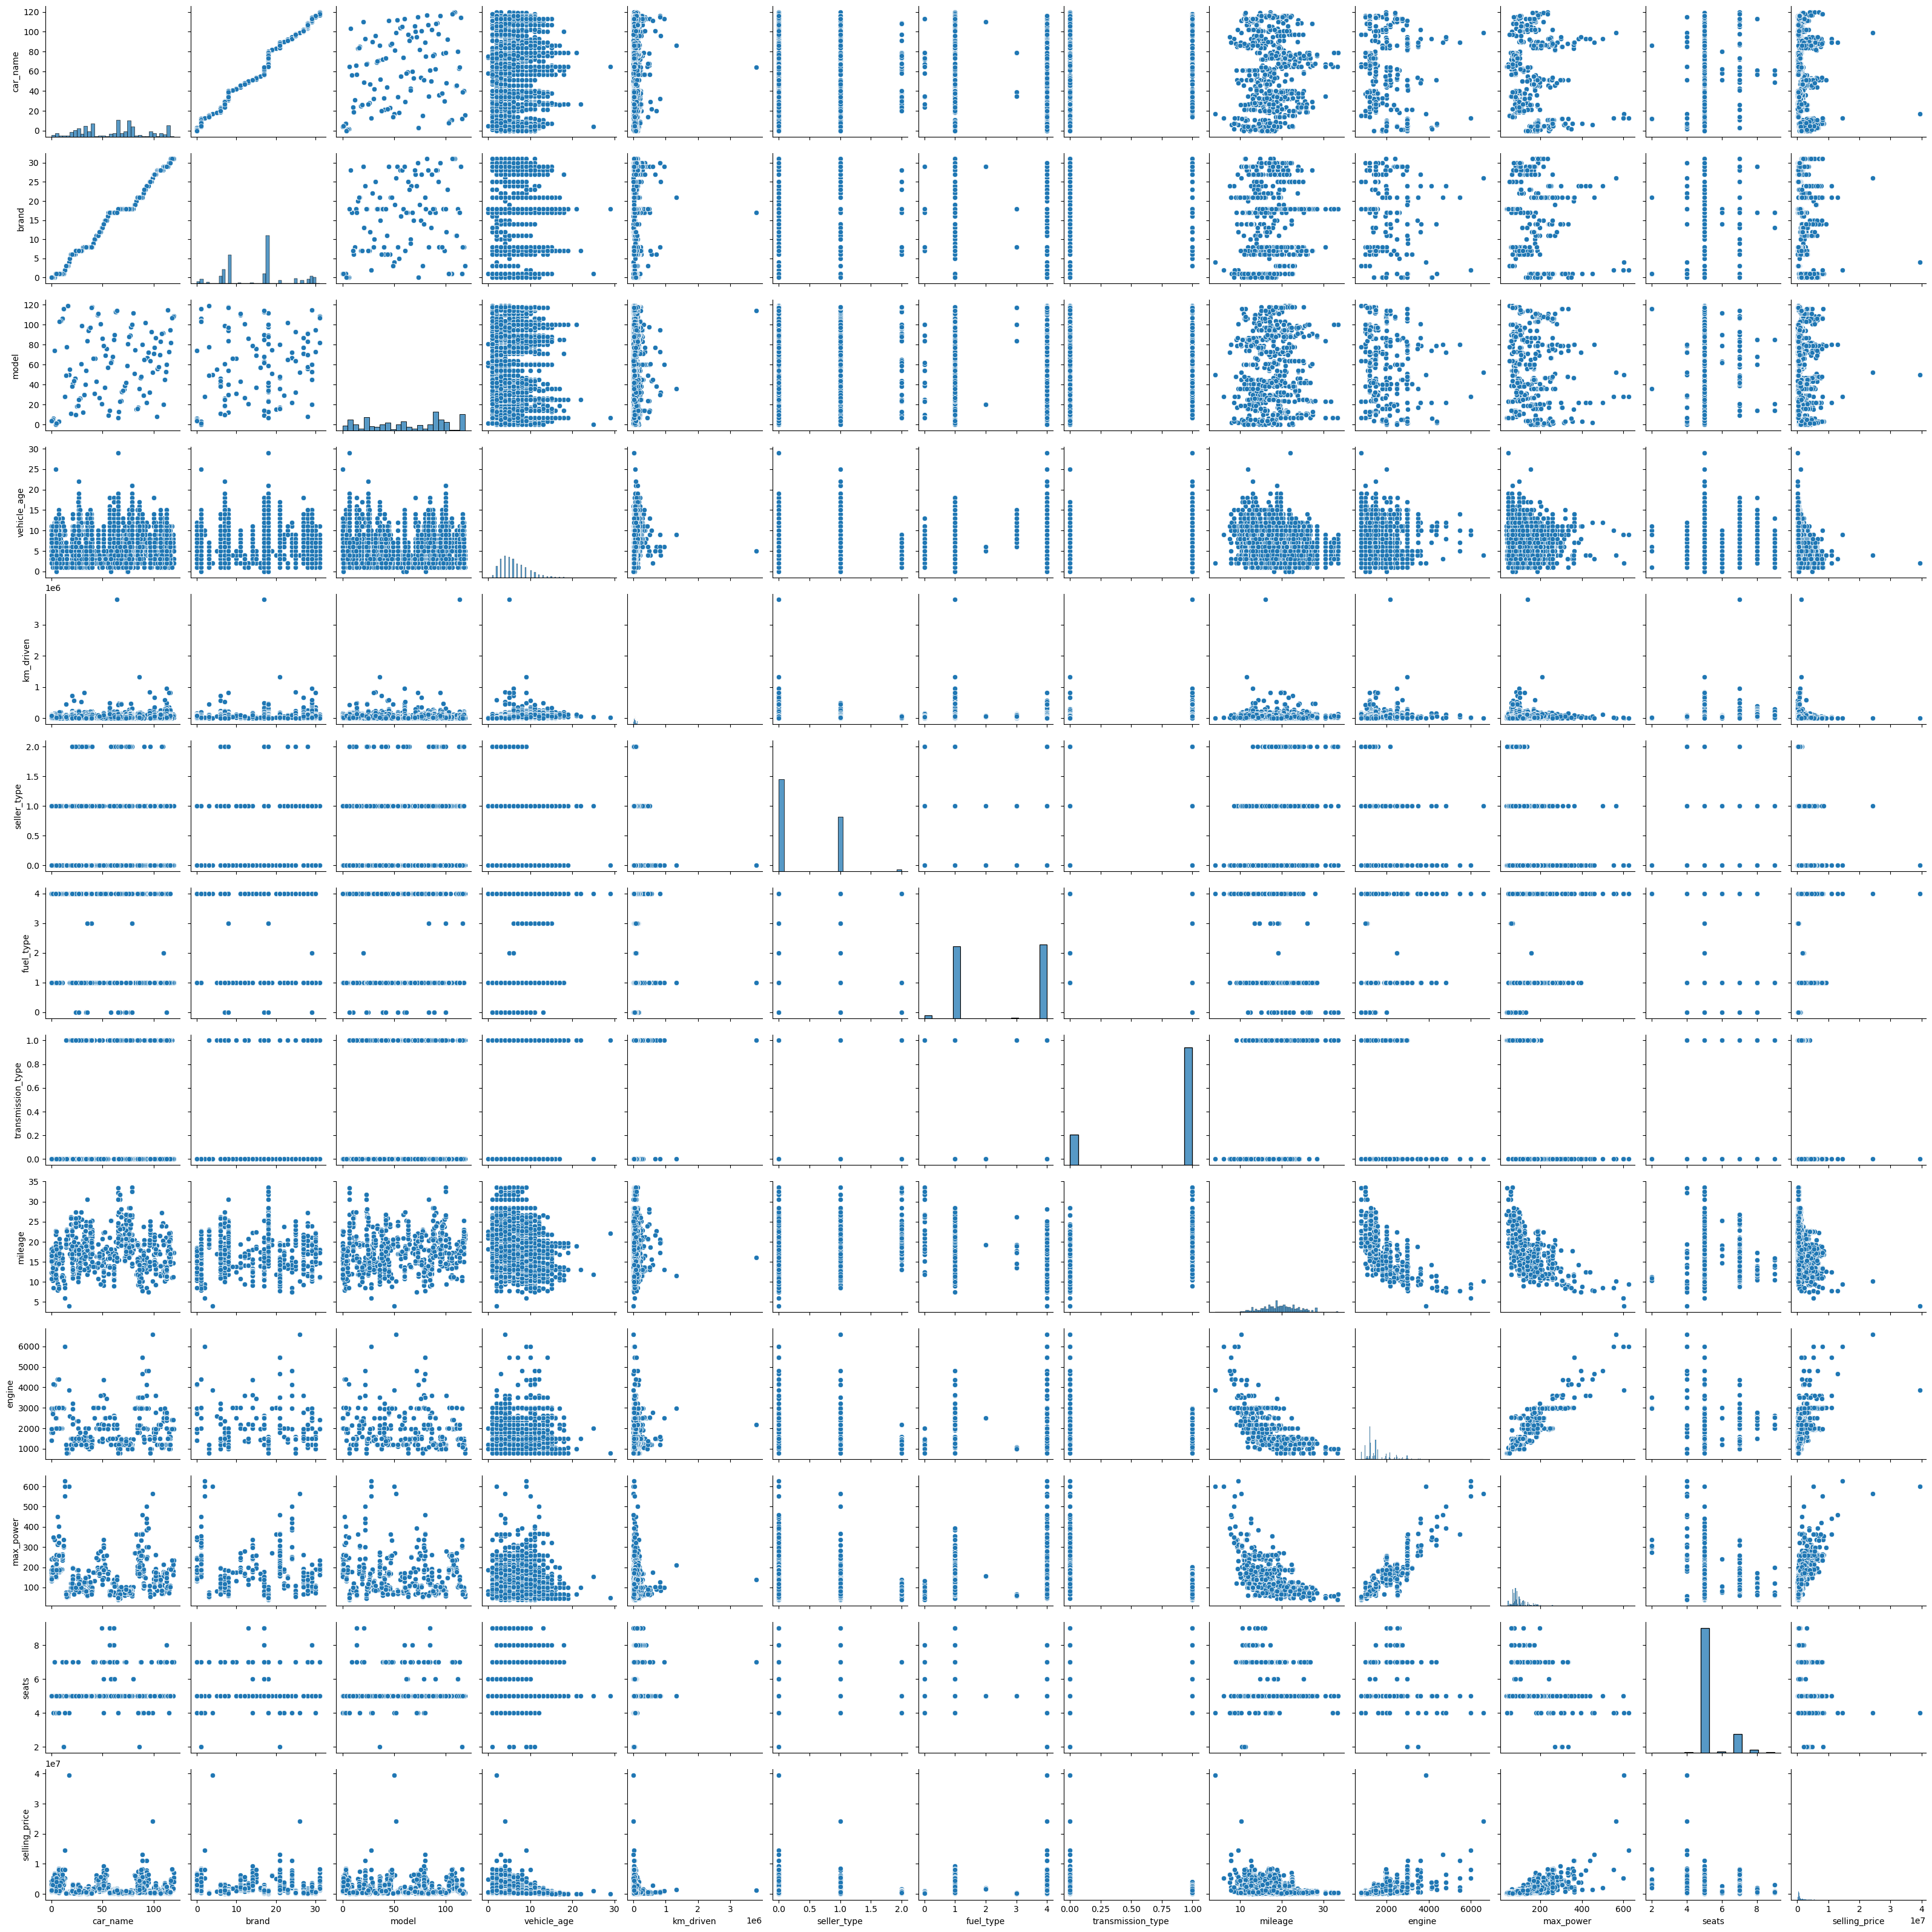

In [160]:

sns.pairplot(df)


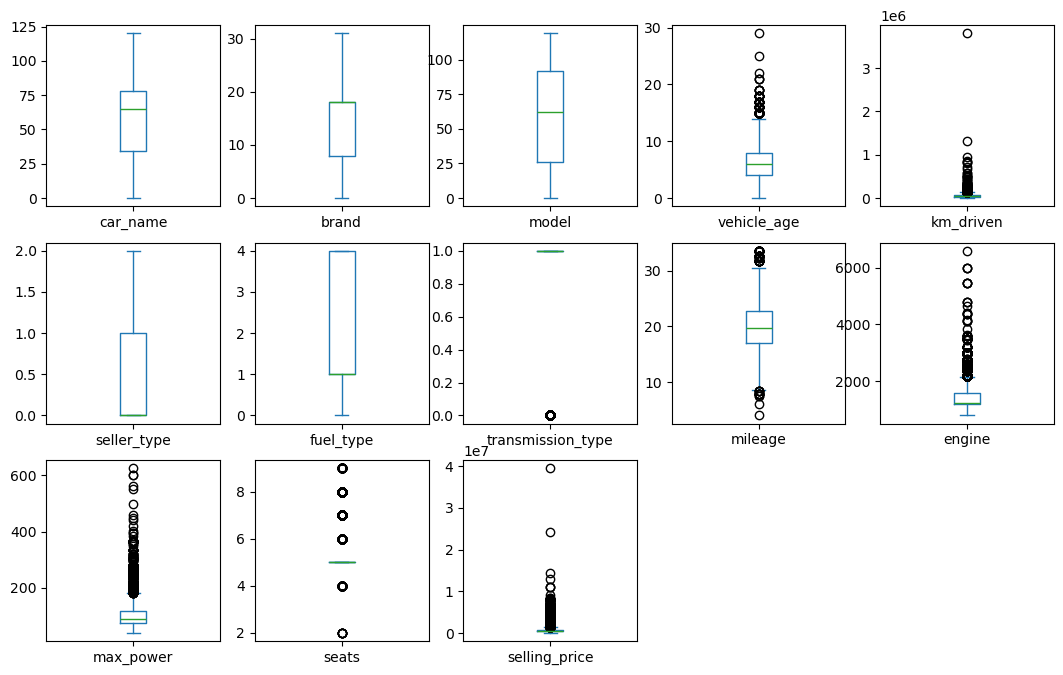

In [161]:

df.plot(kind = 'box', subplots = True, layout = (3, 5), figsize = (13, 8))
plt.show()


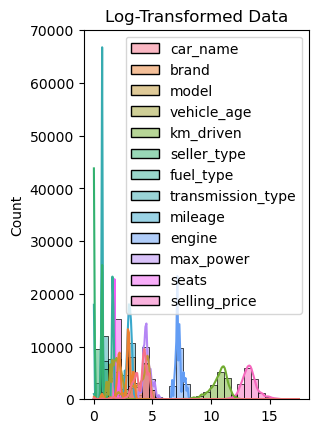

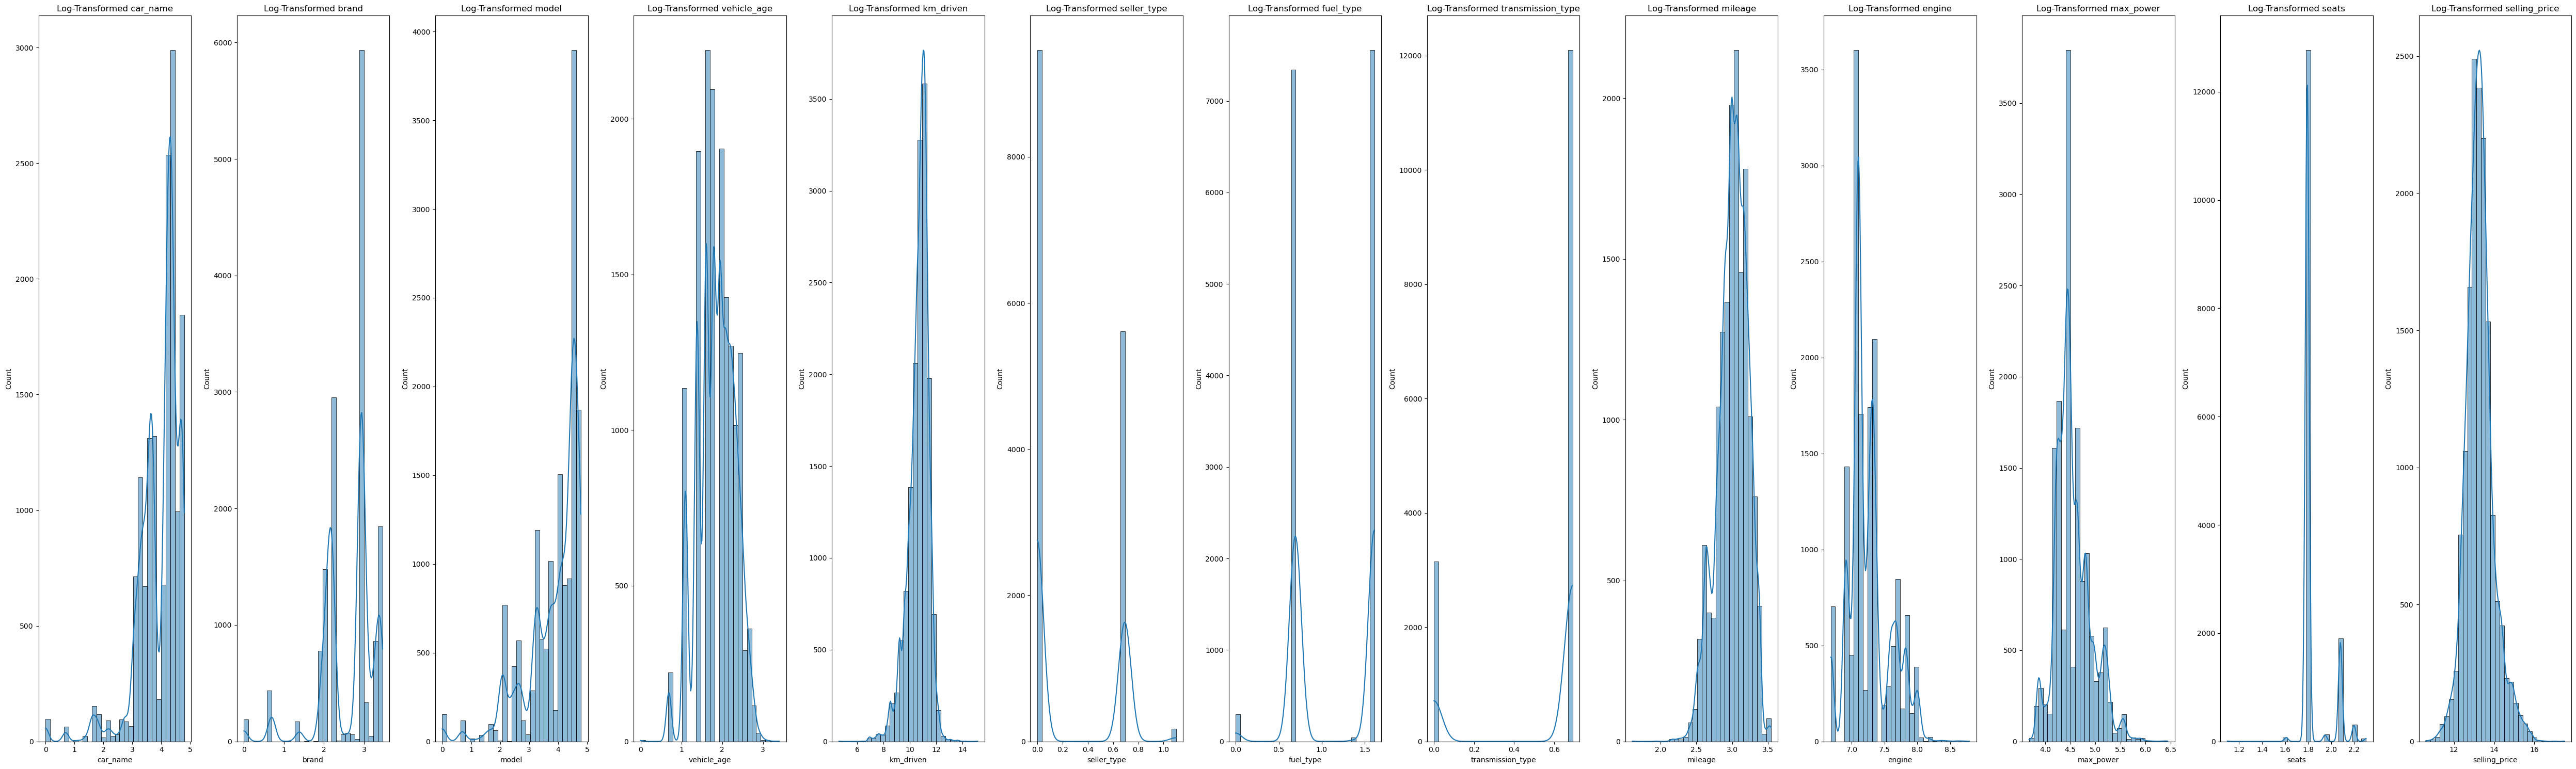

In [162]:

#To handle skewness
import numpy as np
log_data = np.log(df + 1)  # Adding 1 to avoid log(0)

# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(log_data, bins = 30, kde = True)
plt.title("Log-Transformed Data")
plt.show()

# Assuming log_data is a DataFrame with multiple features
num_features = log_data.shape[1]  # Number of features
plt.figure(figsize = (50, 15))  # Adjust the figure size as needed

for i, column in enumerate(log_data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(log_data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()


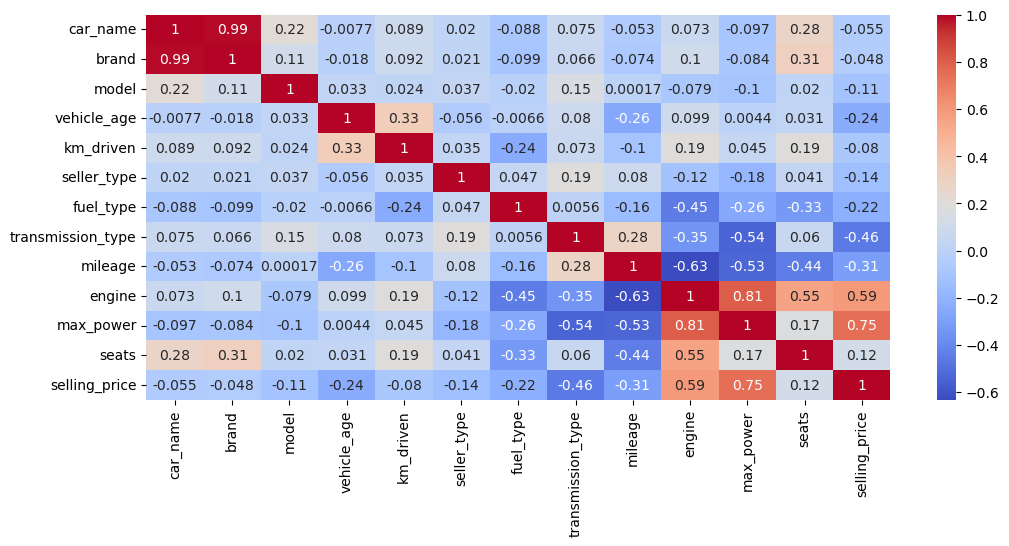

In [163]:

x = df.corr()
plt.figure(figsize =(12, 5))
sns.heatmap(x, annot = True, cmap = 'coolwarm')
plt.show()


In [165]:

df.drop(columns = ['car_name'],inplace = True)
df.drop(columns = ['brand'],inplace = True)
df.drop(columns = ['model'],inplace = True)
df.drop(columns = ['km_driven'],inplace = True)
df.drop(columns = ['seller_type'],inplace = True)
df.drop(columns = ['seats'],inplace = True)


In [167]:

Q1=np.quantile(df, 0.25)
Q2=np.quantile(df, 0.50)
Q3=np.quantile(df, 0.75)
Q1, Q2, Q3


(4.0, 19.67, 1197.0)

In [168]:

IQR = Q3 - Q1
IQR


1193.0

In [169]:

def remove_outliers_iqr(df, column):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 2  * IQR
    upper_bound = Q3 + 2 * IQR

    # Filter out the outliers from the DataFrame
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered
for i in df.columns:
    df = remove_outliers_iqr(df, i)


In [170]:

df = log_data


In [171]:

# Define features and target variable
x = df[['vehicle_age', 'fuel_type', 'transmission_type', 'mileage', 'engine', 'max_power']] # Features
y = df['selling_price']    # Target variable


In [172]:

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [173]:

# Train a linear regression model
model = LinearRegression()
model.fit(x_train, y_train)


LinearRegression()

In [174]:

# Predict and evaluate the model
y_pred = model.predict(x_test)


In [175]:

# Model evalution
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae:.2f}')
print(f'Root Mean Squared Error: {rmse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Absolute Error: 0.21
Root Mean Squared Error: 0.27
R-squared: 0.84


In [176]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,4.189655,2.944439,2.079442,2.302585,11.695255,0.693147,1.609438,0.693147,3.030134,6.680855,3.856510,1.791759,11.695255
1,3.555348,2.197225,4.007333,1.791759,9.903538,0.693147,1.609438,0.693147,2.990720,7.088409,4.418841,1.791759,13.217675
2,3.713572,2.197225,4.779123,2.484907,11.002117,0.693147,1.609438,0.693147,2.890372,7.088409,4.394449,1.791759,12.278398
3,4.189655,2.944439,2.079442,2.302585,10.518700,0.693147,1.609438,0.693147,3.087399,6.906755,4.220977,1.791759,12.328295
4,3.044522,1.945910,3.663562,1.945910,10.308986,0.000000,0.693147,0.693147,3.168424,7.312553,4.601062,1.791759,13.253393


In [182]:

vehicle_age       = float(input('Enter vehicle_age       -'))
fuel_type         = float(input('Enter fuel_type         -'))
transmission_type = float(input('Enter transmission_type -'))
mileage           = float(input('Enter mileage           -'))
engine            = float(input('Enter engine            -'))
max_power         = float(input('Enter max_power         -'))

user_input = [[vehicle_age, fuel_type, transmission_type, mileage, engine, max_power]]

# make a prediction using the trained model 
selling_price = model.predict(user_input)
print(f'selling_price :{selling_price}')


Enter vehicle_age       - 2.302585
Enter fuel_type         - 1.609438
Enter transmission_type - 0.693147
Enter mileage           - 3.030134
Enter engine            - 6.680855
Enter max_power         - 3.856510


selling_price :[11.88267251]


C:\Users\Pc\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
